# IDEA : EDA On Retail Sales Data : 

### Description:  
In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.  

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset :

In [145]:
df=pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [146]:
df.shape
# collection of rows and columns

(1000, 9)

In [147]:
df.info()
# information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [148]:
df['Date']=pd.to_datetime(df['Date'])
# converting into datetime datatype 

In [149]:
df.describe()
# statistical information about the dataset

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [150]:
df.isnull().sum()
# checking null values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [151]:
df.duplicated().sum()
# checking for duplicate records 

0

In [152]:
df.columns
# columns in a dataset 

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [153]:
# print(df.columns.tolist())

In [154]:
df.nunique()
# no.of unique values in a dataset 

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

### Univariate Analysis   : 

In [155]:
df.select_dtypes(include=['number']).columns

Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')

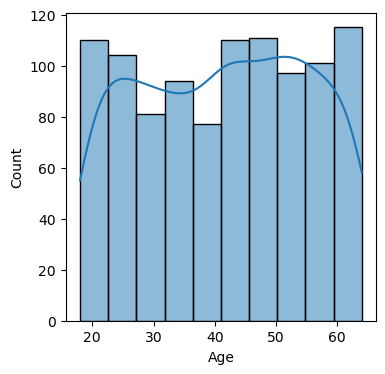

In [156]:
# What are the top product categories?
plt.figure(figsize=(4,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.show()

Customers from all age groups, but most buyers are middle-aged adults (40–60).   
There are fewer very young (under 25) and older (above 65) customers.  
So,Plan discounts ans social media ads to attratc younger buyers and also create offers to attract old customers from 40-60 age groups.  

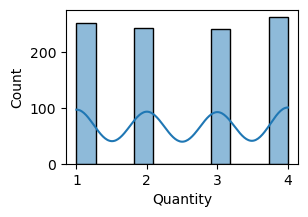

In [157]:
plt.figure(figsize=(3,2))
sns.histplot(df['Quantity'],kde=True)
plt.show()

In [158]:
df['Quantity'].value_counts()

4    263
1    253
2    243
3    241
Name: Quantity, dtype: int64

So,the distribution of column almost equal so,you can also attract customers by offering 
"Buy2 get1 free" and you need to maintain stocks because the quantities are stable.   

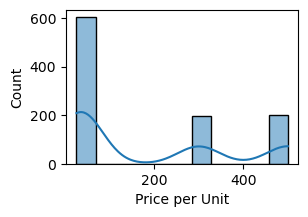

In [159]:
plt.figure(figsize=(3,2))
sns.histplot(df['Price per Unit'],kde=True)
plt.show()

In [160]:
df['Price per Unit'].value_counts()

50     211
25     210
500    199
300    197
30     183
Name: Price per Unit, dtype: int64

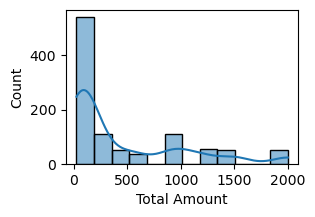

In [161]:
plt.figure(figsize=(3,2))
sns.histplot(df['Total Amount'],kde=True)
plt.show()

Most of the customer sales are in between 50 and 100 so, we need to increase the sales by discounting and offers to increase sales 

In [162]:
df['Total Amount'].value_counts()

50      115
100     108
900      62
200      62
1200     54
30       51
500      51
25       51
1500     50
1000     49
2000     49
300      46
60       45
90       44
120      43
75       43
150      42
600      35
Name: Total Amount, dtype: int64

In [163]:
df['Date'].value_counts()

2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: Date, Length: 345, dtype: int64

In [164]:
# Monthly sales trend
df['Month'] = df['Date'].dt.month_name()

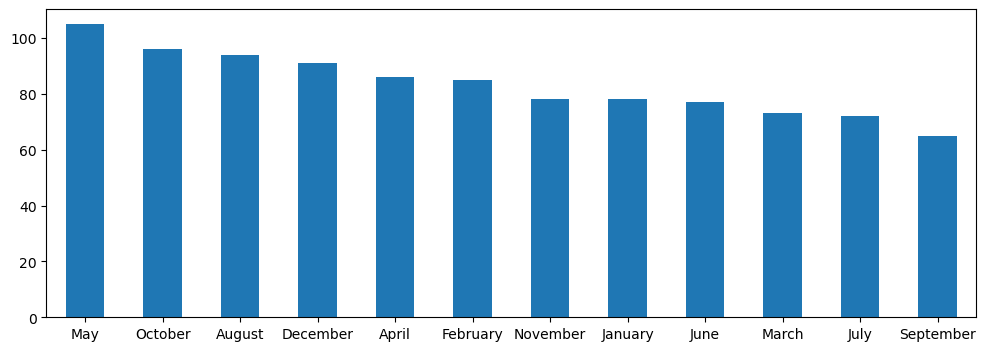

In [165]:
plt.figure(figsize=(12,4))
df['Month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [166]:
df.select_dtypes(include=['object']).columns

Index(['Customer ID', 'Gender', 'Product Category', 'Month'], dtype='object')

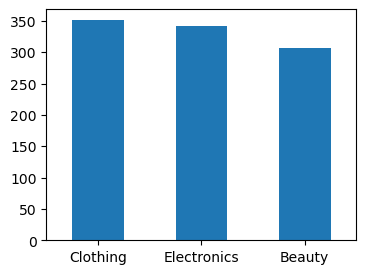

In [167]:
# What are the top product categories?
plt.figure(figsize=(4,3))
df['Product Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

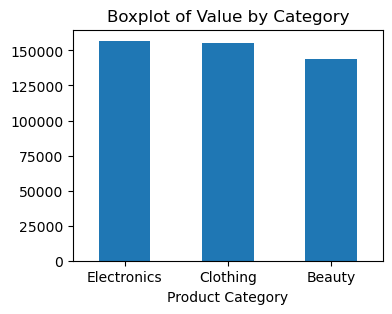

In [168]:
# Which product categories generate highest total revenue?
plt.figure(figsize=(4,3))
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Boxplot of Value by Category")
plt.xticks(rotation=0)
plt.show()

Most of the sales from clothing and Electronics compared to Beauty so,bring new beauty products and check with expired Dates and need to promote beauty products.  

### Bivariate Relationship : 

#### Numeric-Numeric Relationship :

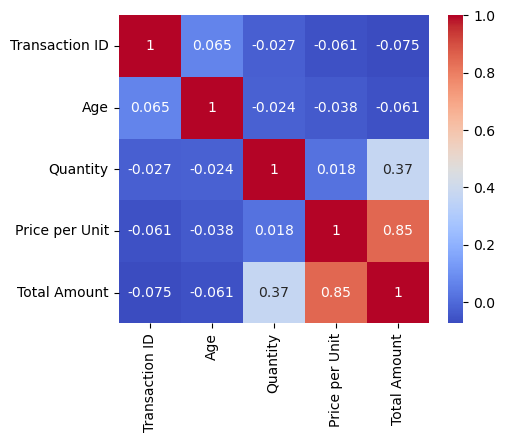

In [169]:
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

Price per unit has Strong correlation with Total Amount.  
Quantity has moderate correlation with Total Amount


#### Categorical - numerical relationship :

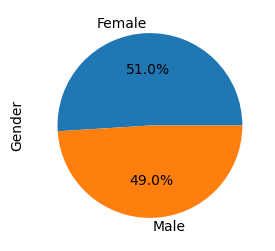

In [170]:
# Which gender buys more?
plt.figure(figsize=(3,3))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Compared to Male,the Female customers performing 10% more sales.so, we need to provide more product categories other than avaliable categories include home and kitchen appliances to increase sales and also provide discounting and bring fashionable clothes for men.

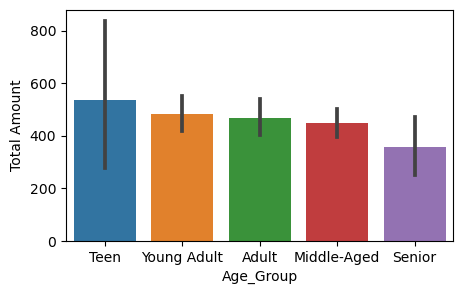

In [171]:
# Which age group buys the most?
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 18, 30, 45, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
plt.figure(figsize=(5,3))
sns.barplot(x='Age_Group', y='Total Amount', data=df)
plt.show()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


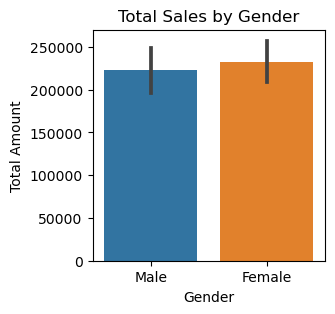

In [172]:
gender_sales = df.groupby('Gender')['Total Amount'].sum().sort_values(ascending=False)
print(gender_sales)
plt.figure(figsize=(3,3))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator='sum')
plt.title('Total Sales by Gender')
plt.show()

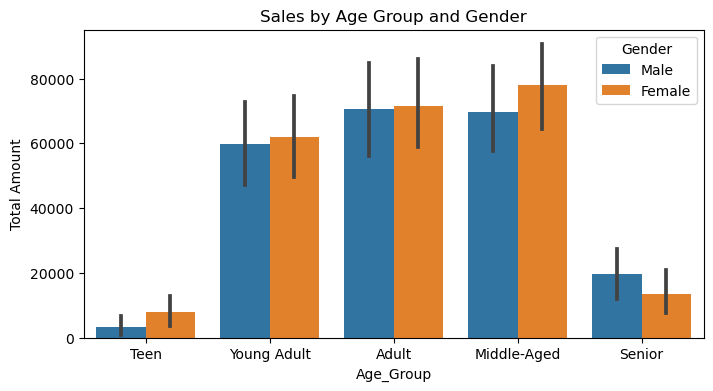

In [173]:
plt.figure(figsize=(8,4))
sns.barplot(x='Age_Group', y='Total Amount', hue='Gender', data=df, estimator='sum')
plt.title('Sales by Age Group and Gender')
plt.show()

We can see the sales from young adult,adults and middle aged groups the consistent sales among female and male but teen and senior level very low sales so we need to provide more product categories and discounts and for senior customers you need to give fast door delivery.  

#### Categorical - Categorical Relationship :

In [174]:
category=pd.crosstab(df['Gender'],df['Product Category'])
print(category)

Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               166       174          170
Male                 141       177          172


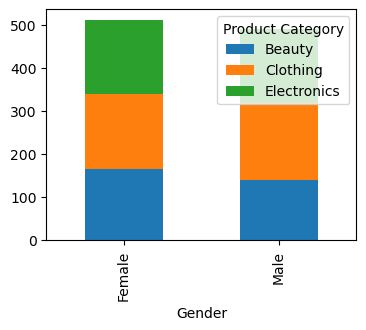

In [175]:
category.plot(kind='bar',stacked=True,figsize=(4,3))
plt.show()

### Multivariate Analysis : 

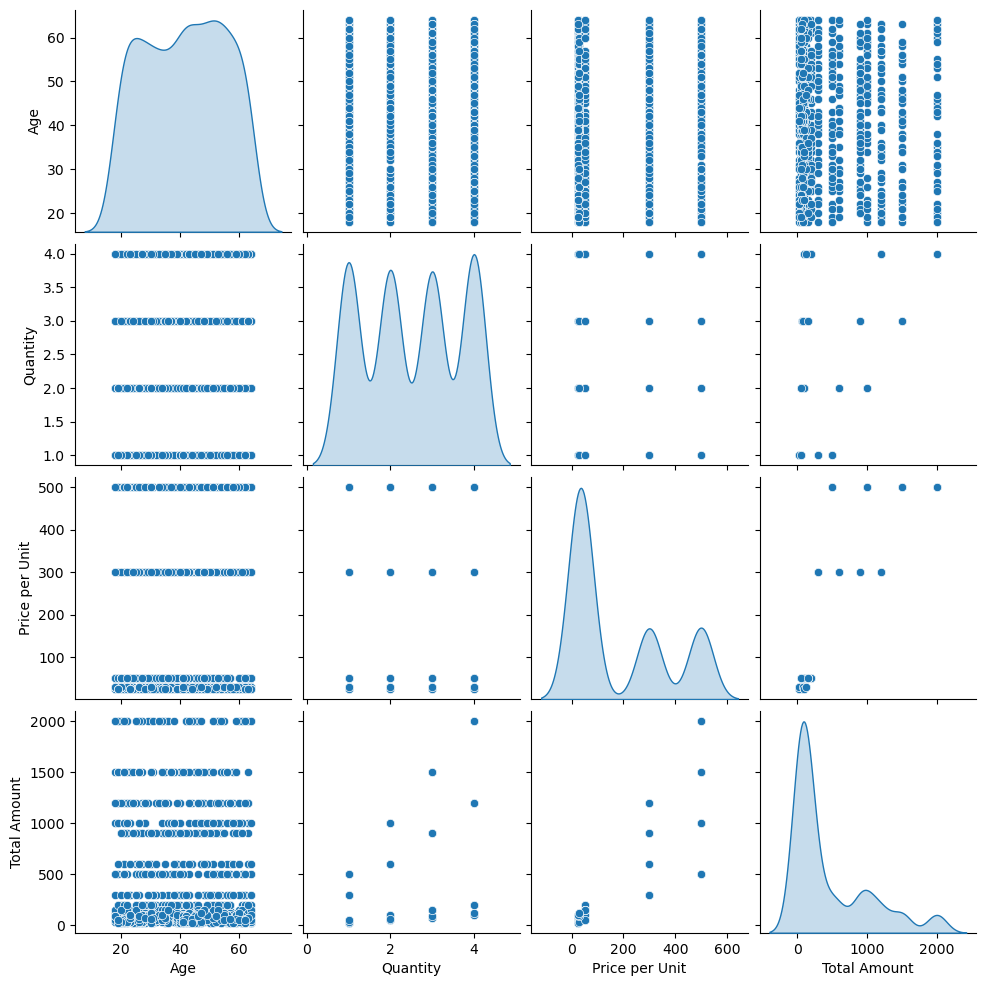

In [176]:
sns.pairplot(df,vars=['Age','Quantity','Price per Unit','Total Amount'],kind='scatter',diag_kind='kde')
plt.show()

In [177]:
# Which product categories are most profitable?
category_sales = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Price per Unit': 'mean',
    'Quantity': 'sum'
}).sort_values(by='Total Amount', ascending=False)

print(category_sales)


                  Total Amount  Price per Unit  Quantity
Product Category                                        
Electronics             156905      181.900585       849
Clothing                155580      174.287749       894
Beauty                  143515      184.055375       771


#### Time series Analysis : 

In [181]:
# What are sales trends over time?

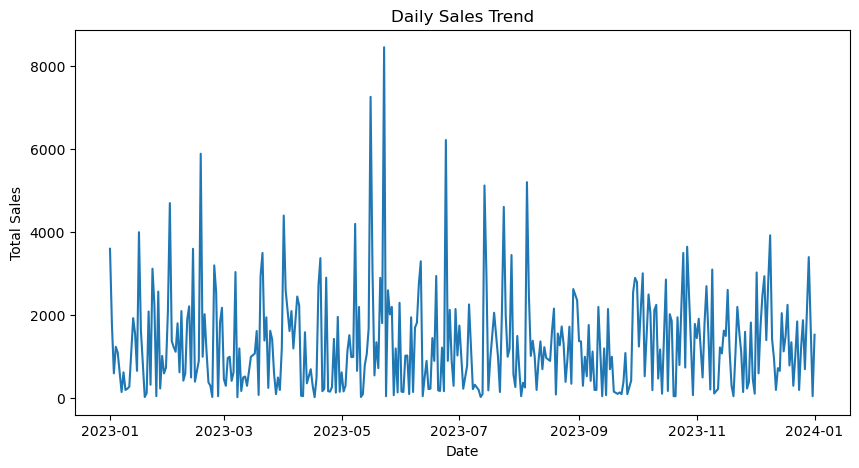

In [182]:
# Daily trend
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

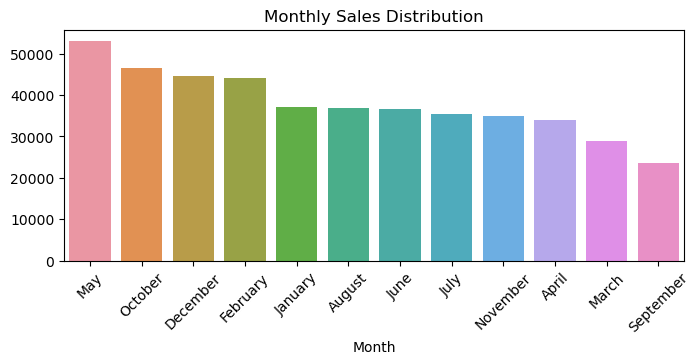

In [183]:
# Monthly trend
df['Month'] = df['Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.show()

Highest sales are in May month and sales are consistent across 2 to 3 months and very low sales on septmeber season so, on festival days of each month provide discounts,offers to increase more sales.   

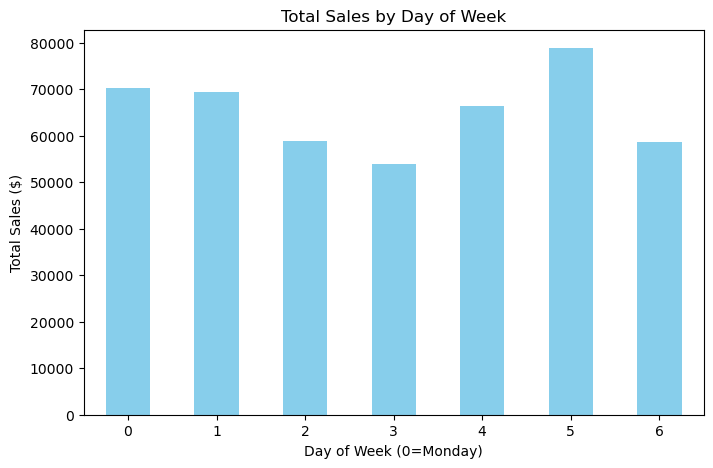

In [184]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Daily sales pattern
daily_sales = df.groupby(df['Date'].dt.dayofweek)['Total Amount'].sum()  # 0=Monday, 6=Sunday
plt.figure(figsize=(8,5))
daily_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0)
plt.show()

In [185]:
# How does quantity and price affect total revenue?

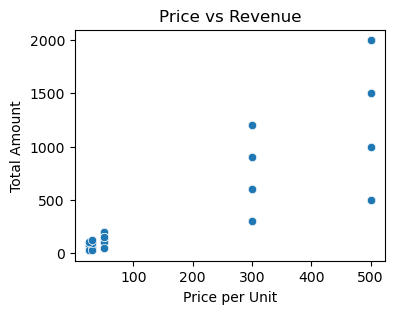

In [186]:
# Scatter plots
plt.figure(figsize=(4,3))
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df)
plt.title('Price vs Revenue')
plt.show()

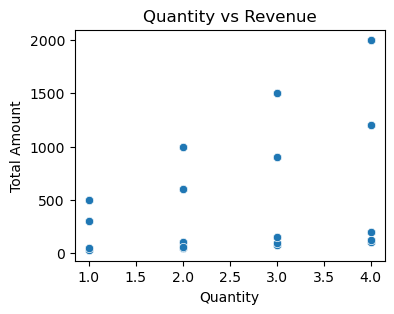

In [187]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title('Quantity vs Revenue')
plt.show()

If quantity increase then price also increases as we know so,must maintain stocks.   

In [188]:
# Correlation check
df[['Quantity', 'Price per Unit', 'Total Amount']].corr()

,Quantity,Price per Unit,Total Amount
Quantity,1.000000,0.017501,0.373707
Price per Unit,0.017501,1.000000,0.851925
Total Amount,0.373707,0.851925,1.000000


#### Customer Insights : 

In [189]:
# top 5 customers 
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
print(top_customers)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64


In [190]:
# Which age group and gender combination contributes most?
pd.crosstab(df['Age_Group'], df['Gender'], values=df['Total Amount'], aggfunc='sum')


Gender,Female,Male
Age_Group,,
Teen,7940,3275
Young Adult,61870,59860
Adult,71510,70445
Middle-Aged,78090,69785
Senior,13430,19795


    Age  Gender  Total Amount
0    18  Female          7940
1    18    Male          3275
2    19  Female          7335
3    19    Male          7535
4    20  Female          5175
..  ...     ...           ...
89   62    Male          5060
90   63  Female          1205
91   63    Male          8045
92   64  Female          6325
93   64    Male          2800

[94 rows x 3 columns]


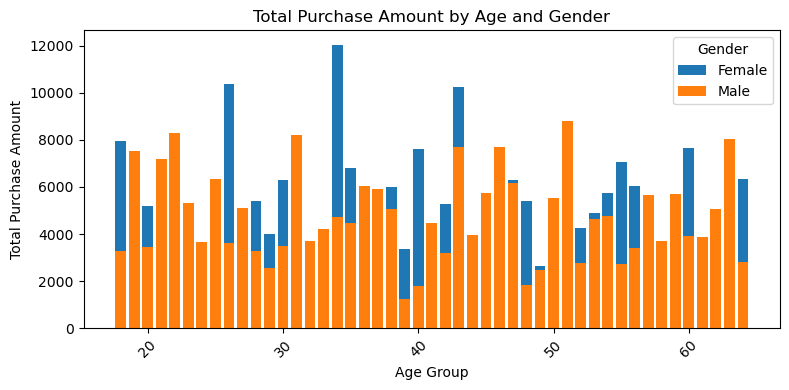

In [191]:
age_gender_sales = df.groupby(['Age', 'Gender'])['Total Amount'].sum().reset_index()
print(age_gender_sales)

# Visualize
plt.figure(figsize=(8,4))
for gender in age_gender_sales['Gender'].unique():
    subset = age_gender_sales[age_gender_sales['Gender'] == gender]
    plt.bar(subset['Age'], subset['Total Amount'], label=gender)

plt.title("Total Purchase Amount by Age and Gender")
plt.xlabel("Age Group")
plt.ylabel("Total Purchase Amount")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


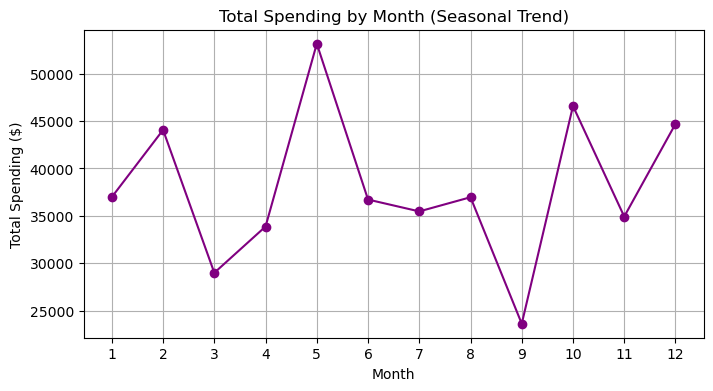

In [192]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_spending = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(8,4))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o', color='purple')
plt.title("Total Spending by Month (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("Total Spending ($)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

#### Customer Insights (Age & Gender):
Customers are spread across all age groups, with a slightly higher concentration of middle-aged customers (40–60 years).  
There are fewer very young (<25) and elderly (>65) customers.  
Both male and female customers are active buyers, with small differences in spending behavior.  

#### Insight : 
Creat youth-targeted promotions to attract younger customers through social media ads.  

#### Purchase Behaviour (Quantity) : 

The number of items bought per transaction (1–4) is almost evenly distributed.  
This indicates consistent purchasing behavior, with no heavy bias toward single-item purchases.  

#### insight :
Introduce offers or discounts for multiple-item purchases to increase the orders.

#### Product&Pricing : 
Certain product categories may generate higher total revenue or frequent purchases.

#### insight : 
Identify top-performing categories and optimize pricing/discounts on slower-moving products.

#### Time-based Analysis :

Sales vary across dates/months, showing potential seasonal trends.  
Certain days or months might show spikes in revenue due to promotions or holidays.  
#### insight : 
Schedule promotions during low-sales periods and strengthen marketing during high-demand months.  

### Conclusion :
The analysis shows that customers from all age groups make purchases, but most buyers are middle-aged (40–60 years). The number of items bought per transaction is almost equal for quantities 1 to 4, showing consistent buying behavior. Overall, the business has a balanced customers and steady sales pattern. These insights can help plan better marketing strategies and product offers to attract more customers and increase sales.  